# Interpreting Customer Segments with Surrogate Models

This notebook focuses on **interpreting the K-Means customer segments** using supervised learning models.

Although K-Means is an unsupervised algorithm, its results can be difficult to explain directly.
To address this limitation, **Decision Tree** and **Random Forest** models are employed as
**surrogate models** to approximate and interpret the cluster assignment logic.

### Objectives:
- Provide **human-readable rules** that explain how customers are segmented
- Identify **key features** driving the clustering structure
- Compare **interpretability vs. stability** across models

It is important to note that these models do **not** predict a real business outcome.
Instead, they are trained to approximate the cluster labels generated by K-Means,
serving purely as post-hoc interpretability tools.


In [16]:
import pandas as pd
df = pd.read_csv("data/customers_with_clusters.csv")

In [17]:
X_explain = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y_cluster = df['Cluster']

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=3,
    random_state=42
)
dt.fit(X_explain, y_cluster)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

Although K-means is an unsupervised method, a shallow decision tree reveals that annual income is the primary factor driving customer 
segmentation. Among high-income customers, spending score plays a decisive role, while age further refines segments within lower-income 
groups. This interpretation aligns closely with the visual cluster structure observed in the 2D and 3D analyses.

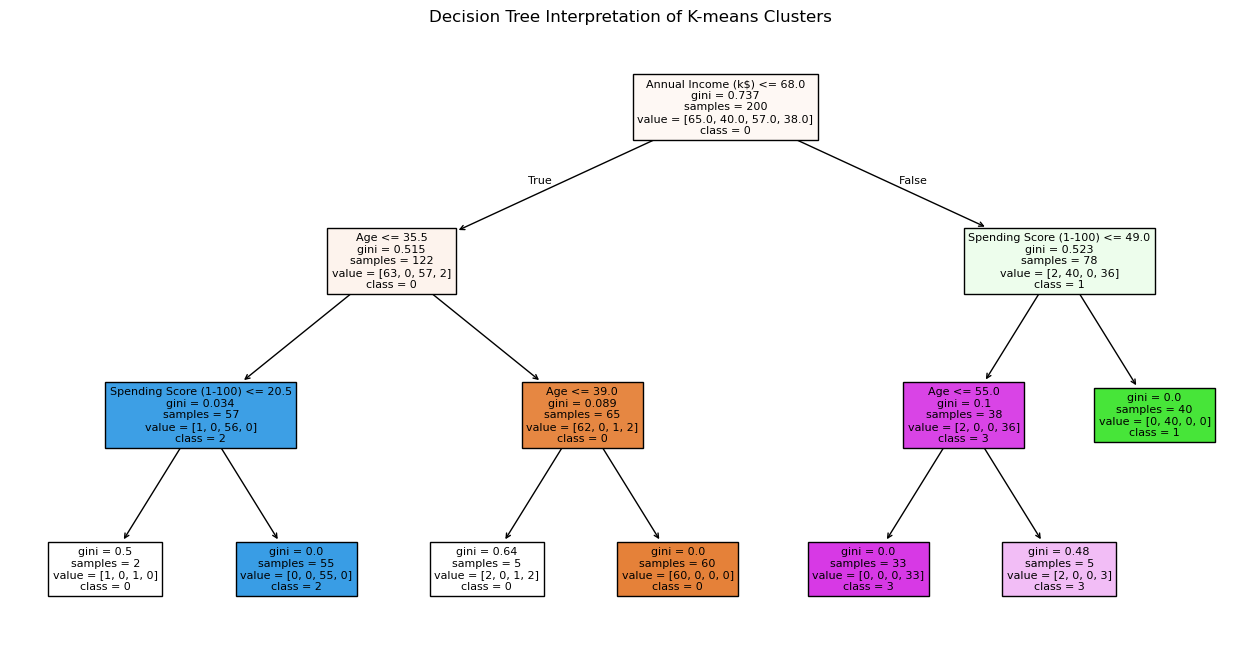

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plot_tree(
    dt,
    feature_names=X_explain.columns,
    class_names=[str(i) for i in sorted(y_cluster.unique())],
    filled=True
)
plt.title("Decision Tree Interpretation of K-means Clusters")
plt.show()

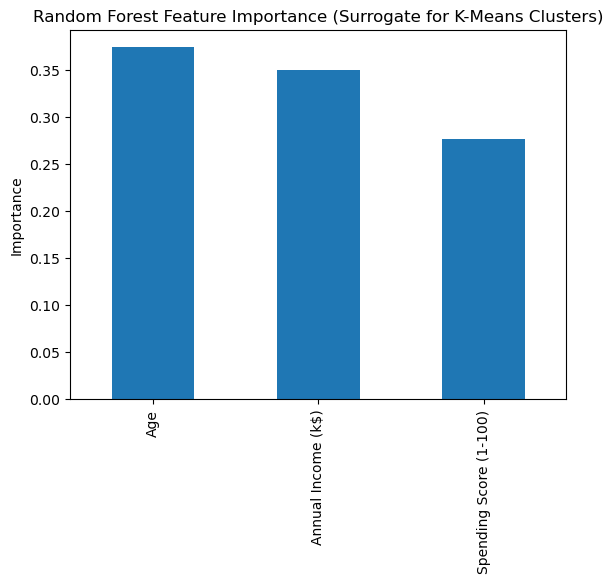

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_explain, y_cluster)

imp = pd.Series(rf.feature_importances_, index=X_explain.columns).sort_values(ascending=False)
imp.plot(kind="bar")
plt.title("Random Forest Feature Importance (Surrogate for K-Means Clusters)")
plt.ylabel("Importance")
plt.show()

Random Forest is used here as a robustness check to assess whether feature usage patterns remain consistent across a more flexible model.

The feature importance ranking broadly aligns with the decision tree interpretation, reinforcing that the K-Means segmentation is primarily structured around income and spending-related behavior.

Unlike the decision tree, Random Forest does not provide explicit rules, so it serves as a stability reference rather than the main interpretability tool.